# Calcul d'indicateur

### Requête MongoDB sous python

In [17]:
#Importation des librairies 
import pymongo
import pprint# permet l’indentation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Connexion à MongoDB
connex= pymongo.MongoClient("mongodb://127.0.0.1:27017/")
db= connex.criminalite
print(db.collection_names())

['crime2', 'crime']


<ipython-input-18-cda5e095abc0>:4: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  print(db.collection_names())


In [5]:
#nombre de documents
print(db.crime2.count())

7393744


<ipython-input-5-786ee7ff89c0>:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  print(db.crime2.count())


In [6]:
def affiche(curseur):
    #fonction qui affiche un curseur avec indentation"""
    pprint.pprint(list(curseur))

# Indicateurs 

## 1- Nombre total de crimes par an

In [8]:
print(db.crime2.find_one()) # Premier document d’une collection

{'_id': ObjectId('613f657586965f1d106dda2f'), 'ID': '10224738', 'Case Number': 'HY411648', 'Date': '09/05/2015 01:30:00 PM', 'Block': '043XX S WOOD ST', 'IUCR': '0486', 'Primary Type': 'BATTERY', 'Description': 'DOMESTIC BATTERY SIMPLE', 'Location Description': 'RESIDENCE', 'Arrest': 'false', 'Domestic': 'true', 'Beat': '0924', 'District': '009', 'Ward': '12', 'Community Area': '61', 'FBI Code': '08B', 'X Coordinate': '1165074', 'Y Coordinate': '1875917', 'Year': '2015', 'Updated On': '02/10/2018 03:50:01 PM', 'Latitude': '41.815117282', 'Longitude': '-87.669999562', 'Location': '(41.815117282, -87.669999562)'}


    Year  Nombre_crimes
0   2001         485812
1   2002         486773
2   2003         475967
3   2004         469407
4   2005         453754
5   2006         448150
6   2007         437061
7   2008         427131
8   2009         392788
9   2010         370435
10  2011         351914
11  2012         336194
12  2013         307376
13  2014         275646
14  2015         264571
15  2016         269608
16  2017         268845
17  2018         268443
18  2019         260790
19  2020         211231
20  2021         131848


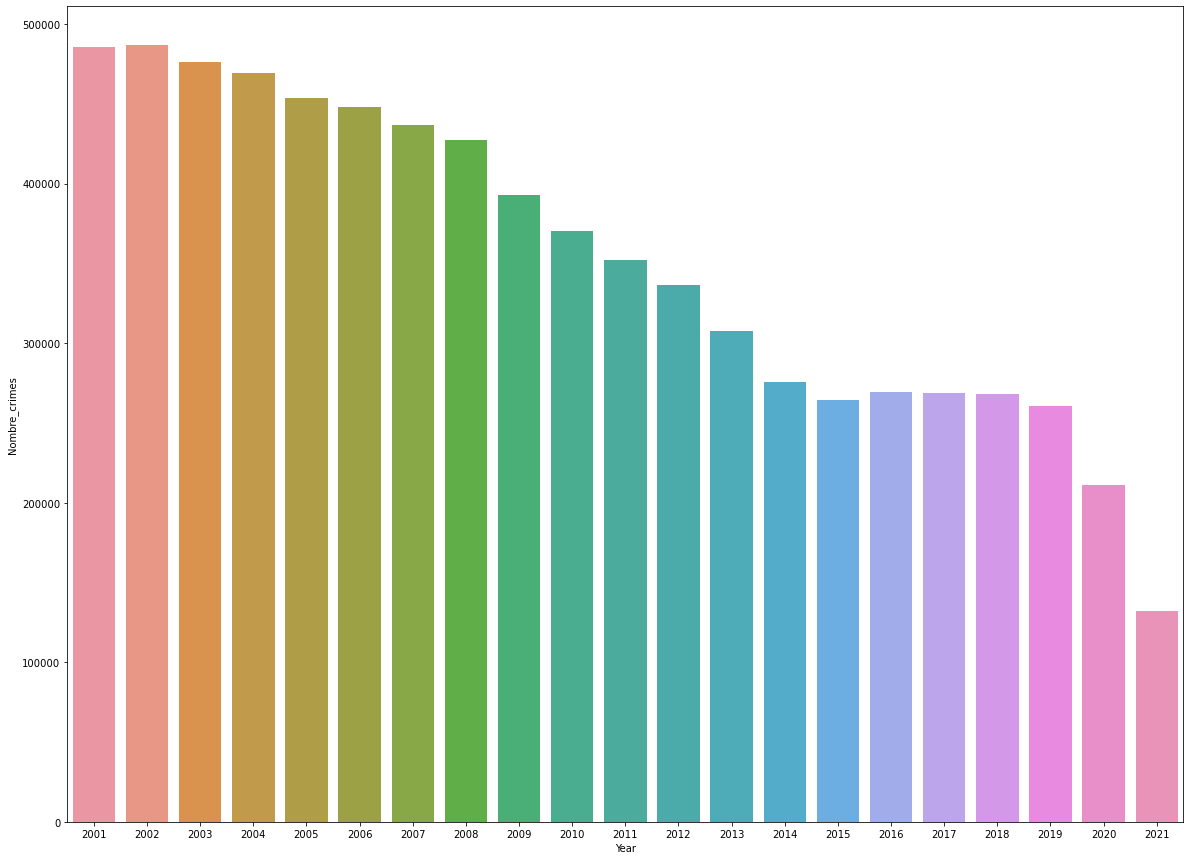

In [9]:
res= db.crime2.aggregate([ 
    {"$group": {"_id": "$Year", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Year", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_crimes",data=nb_crimes)

    Year  Nombre_crimes
0   2001         485812
1   2002         486773
2   2003         475967
3   2004         469407
4   2005         453754
5   2006         448150
6   2007         437061
7   2008         427131
8   2009         392788
9   2010         370435
10  2011         351914
11  2012         336194
12  2013         307376
13  2014         275646
14  2015         264571
15  2016         269608
16  2017         268845
17  2018         268443
18  2019         260790
19  2020         211231
20  2021         131848


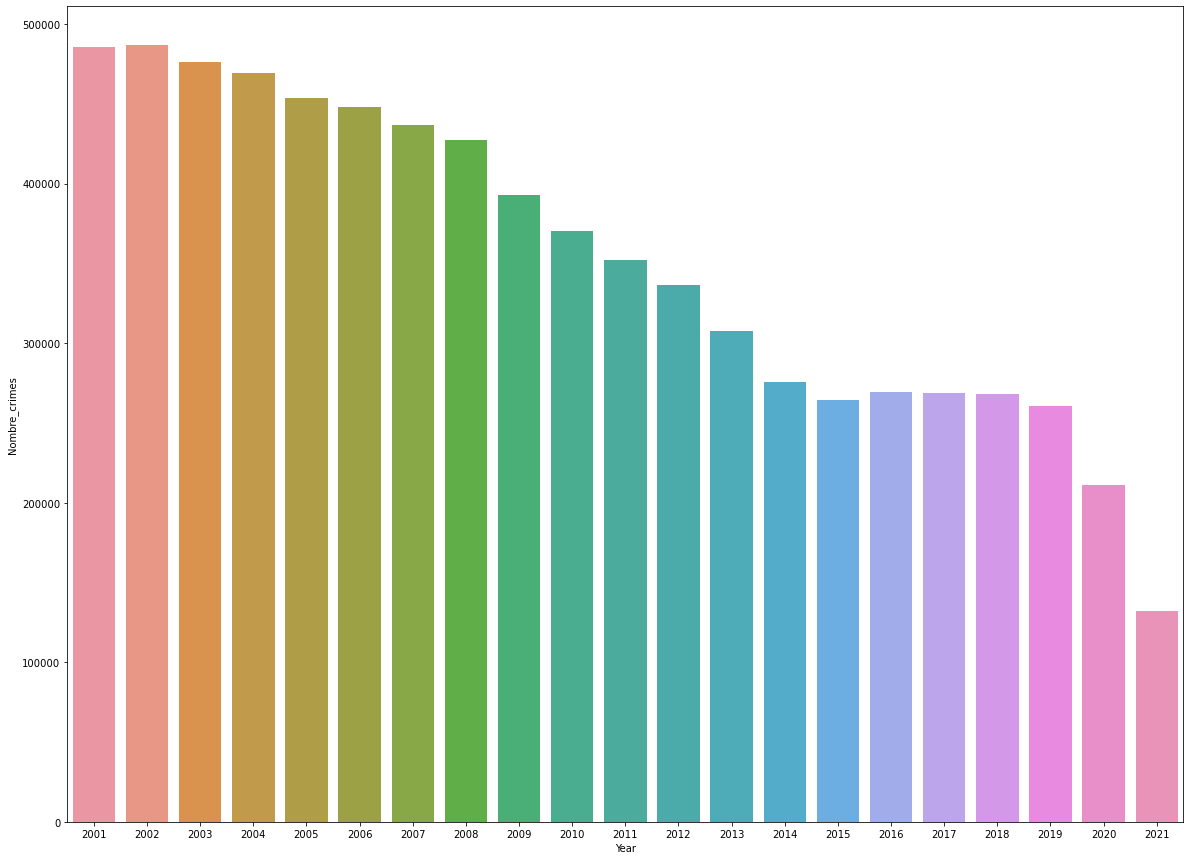

In [9]:
res= db.crime2.aggregate([ 
    {"$group": {"_id": "$Year", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Year", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_crimes",data=nb_crimes)

## 2- Nombre total d'arrestations par an

    Year  Nombre_arrestations
0   2001               141921
1   2002               141560
2   2003               141580
3   2004               144694
4   2005               140914
5   2006               135405
6   2007               131868
7   2008               110006
8   2009               110812
9   2010               100520
10  2011                96271
11  2012                90636
12  2013                86511
13  2014                79600
14  2015                70002
15  2016                52981
16  2017                52587
17  2018                53805
18  2019                56086
19  2020                33811
20  2021                16429


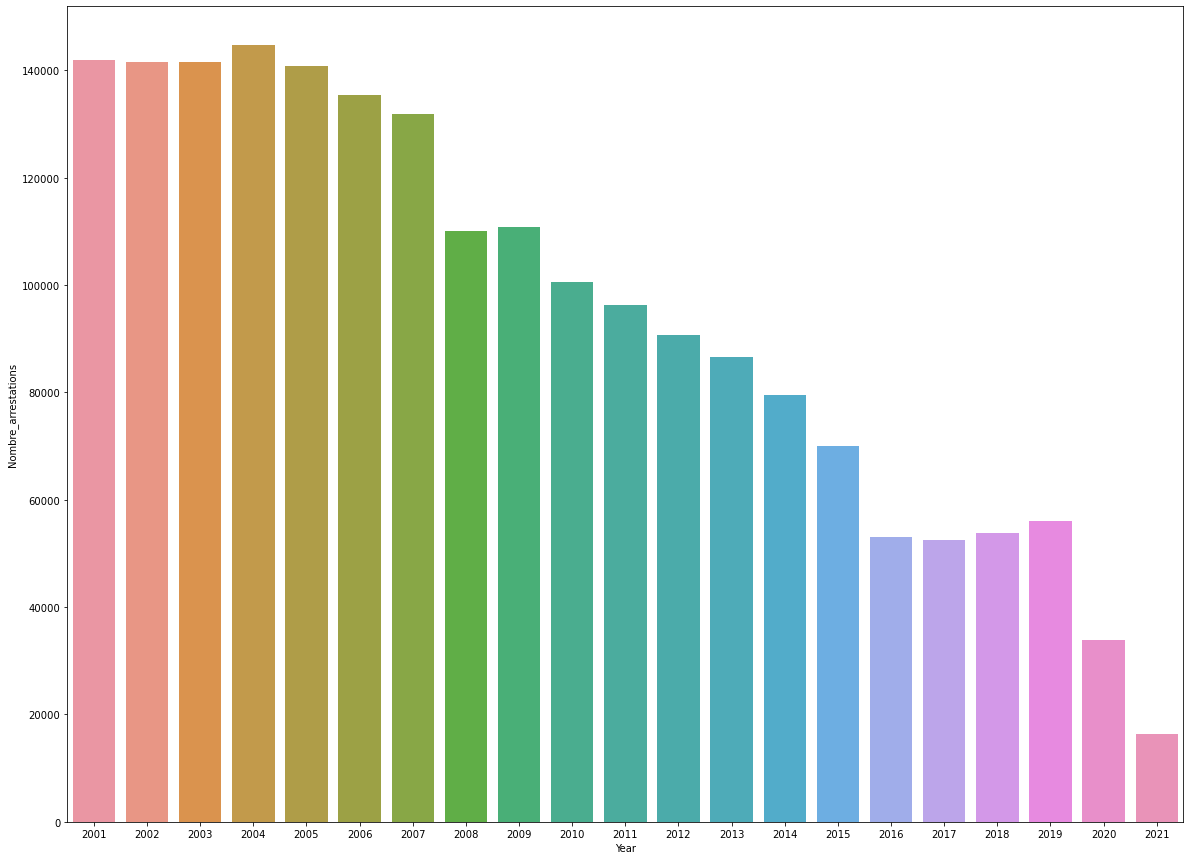

In [11]:
res= db.crime2.aggregate([ 
    {"$match": {"Arrest": "true"}},
    {"$group": {"_id": "$Year", "Nombre_arrestations":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_arrestations = pd.DataFrame(list(res)).rename(columns = {"_id":"Year", "Nombre_arrestations":"Nombre_arrestations"})
print(nb_arrestations)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_arrestations",data=nb_arrestations)

## 3- Nombre total de crimes par Local Description

    Location Description  Nombre_crimes
210                OTHER         270072
211             SIDEWALK         709201
212            APARTMENT         803529
213            RESIDENCE        1254780
214               STREET        1918700


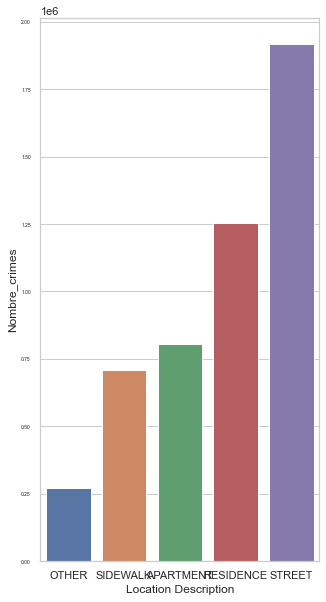

In [19]:
res= db.crime2.aggregate([ 
    {"$group": {"_id": "$Location Description", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Location Description", "Nombre_crimes":"Nombre_crimes"})
nb_crimes = nb_crimes.tail(5)

print(nb_crimes)

# Histogramme 

# Histogramme 
plt.subplots(figsize=(5,10))
plt.yticks(fontsize=5)
s = sns.barplot(x="Location Description", y= "Nombre_crimes",data=nb_crimes)

## 4- Nombre total de crimes par “Primary Type”

                         Primary Type  Nombre_crimes
0                   DOMESTIC VIOLENCE              1
1    NON-CRIMINAL (SUBJECT SPECIFIED)              9
2                           RITUALISM             24
3                      NON - CRIMINAL             38
4                   HUMAN TRAFFICKING             73
5            OTHER NARCOTIC VIOLATION            140
6                        NON-CRIMINAL            175
7                    PUBLIC INDECENCY            187
8                           OBSCENITY            744
9   CONCEALED CARRY LICENSE VIOLATION            786
10            CRIMINAL SEXUAL ASSAULT           3697
11                           STALKING           4069
12                       INTIMIDATION           4360
13                         KIDNAPPING           7038
14                           HOMICIDE          11368
15                              ARSON          12513
16               LIQUOR LAW VIOLATION          14546
17                           GAMBLING         

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Nombre_crimes')]

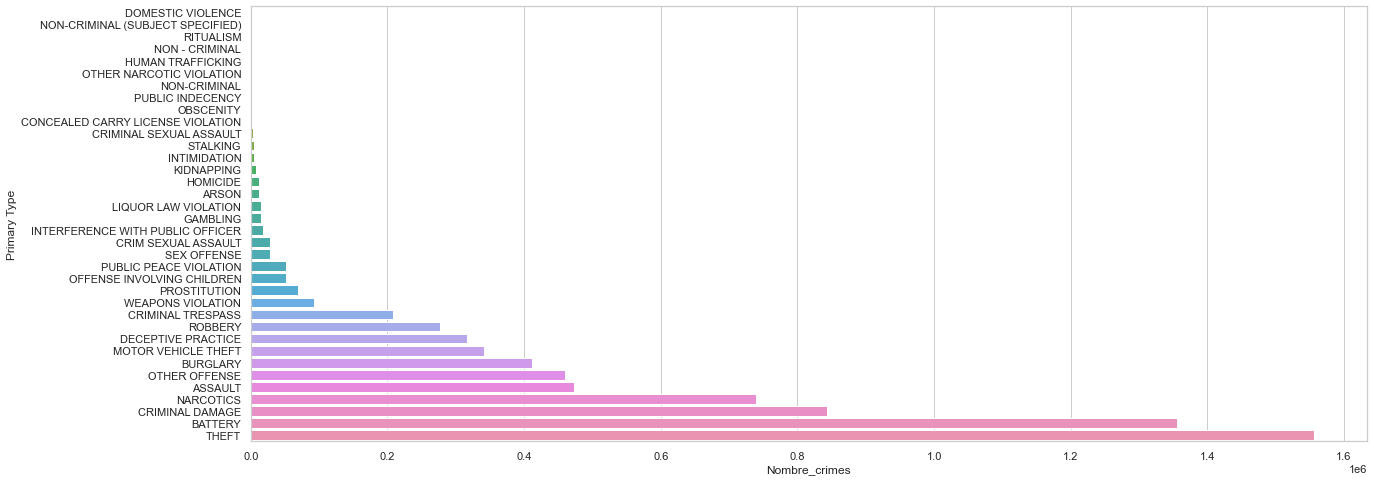

In [13]:
res= db.crime2.aggregate([ 
    {"$group": {"_id": "$Primary Type", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Primary Type", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Nombre_crimes', y='Primary Type', data=nb_crimes)
type_graph.set(ylabel="Primary Type", xlabel="Nombre_crimes")

### 5- Nombre total de vols par "Description" et "Location Description"

                                Location Description  Nombre_crimes_THEFT
0                                               FARM                    1
1                   VEHICLE-COMMERCIAL - TROLLEY BUS                    1
2    VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS                    1
3                                       HORSE STABLE                    1
4                  VEHICLE - COMMERCIAL: TROLLEY BUS                    2
..                                               ...                  ...
138                               SMALL RETAIL STORE                76353
139                                        APARTMENT                82397
140                                            OTHER                84916
141                                        RESIDENCE               161266
142                                           STREET               420243

[143 rows x 2 columns]


[Text(0, 0.5, 'Nombre_crimes_THEFT'), Text(0.5, 0, 'Location Description')]

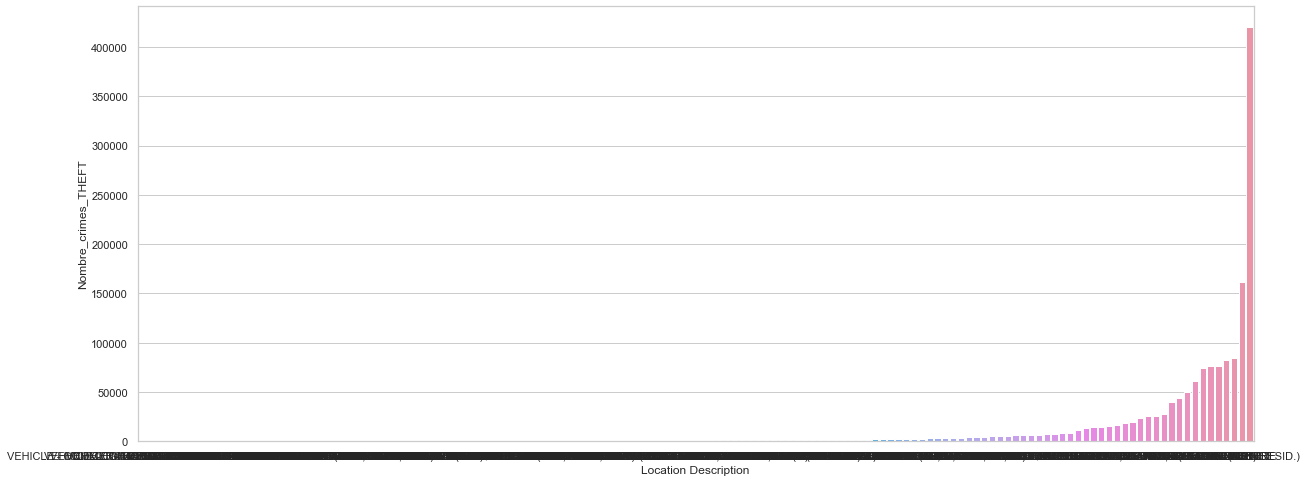

In [14]:
res= db.crime2.aggregate([ 
    {"$match": {"Primary Type": "THEFT"}},
    {"$group": {"_id": "$Location Description", "Nombre_crimes_THEFT":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes_THEFT": 1 } },
])

nb_crimes_theft = pd.DataFrame(list(res)).rename(columns = {"_id":"Location Description", "Nombre_crimes_THEFT":"Nombre_crimes_THEFT"})
print(nb_crimes_theft)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Location Description', y='Nombre_crimes_THEFT', data=nb_crimes_theft)
type_graph.set(ylabel="Nombre_crimes_THEFT", xlabel="Location Description")

                             Description  Nombre_crimes_THEFT
0                           THEFT RETAIL                    1
1    FINANCIAL IDENTITY THEFT: OVER $300                    2
2                              OVER $300                   13
3   FROM COIN-OPERATED MACHINE OR DEVICE                   15
4                         $300 AND UNDER                   15
5               DELIVERY CONTAINER THEFT                  974
6            FROM COIN-OP MACHINE/DEVICE                 1117
7                AGG: FINANCIAL ID THEFT                 2901
8       ATTEMPT FINANCIAL IDENTITY THEFT                 2955
9                          ATTEMPT THEFT                12092
10        FINANCIAL ID THEFT:$300 &UNDER                15206
11                       PURSE-SNATCHING                17729
12                        POCKET-PICKING                37316
13         FINANCIAL ID THEFT: OVER $300                44529
14                          RETAIL THEFT               189531
15      

[Text(0, 0.5, 'Nombre_crimes_THEFT'), Text(0.5, 0, 'Description')]

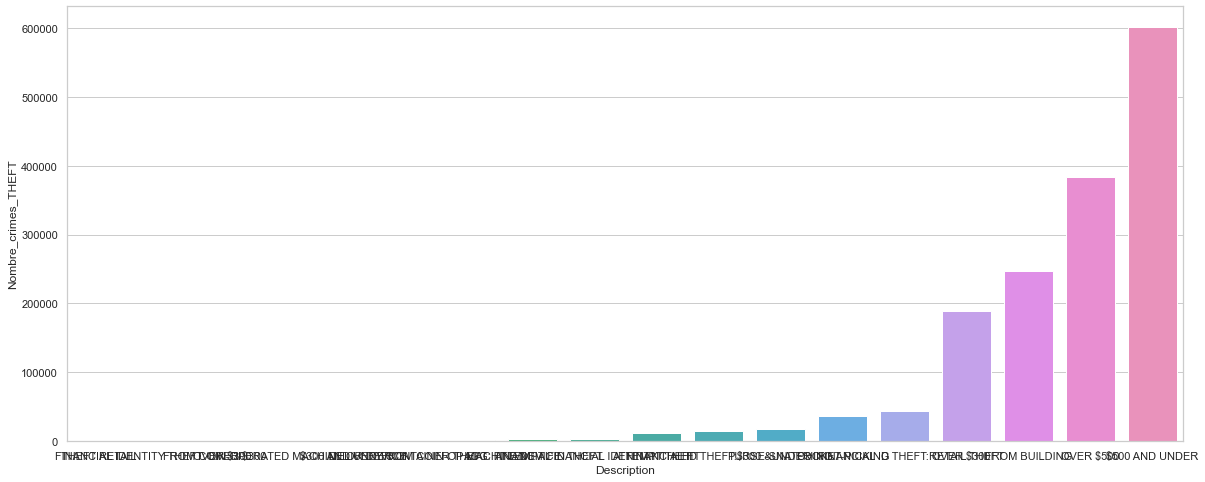

In [15]:
res= db.crime2.aggregate([ 
    {"$match": {"Primary Type": "THEFT"}},
    {"$group": {"_id": "$Description", "Nombre_crimes_THEFT":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes_THEFT": 1 } },
])

nb_crimes_theft = pd.DataFrame(list(res)).rename(columns = {"_id":"Description", "Nombre_crimes_THEFT":"Nombre_crimes_THEFT"})
print(nb_crimes_theft)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Description', y='Nombre_crimes_THEFT', data=nb_crimes_theft)
type_graph.set(ylabel="Nombre_crimes_THEFT", xlabel="Description")